# Number of Tickets sold per genre vs Income

How does the economy impact the popularity of movie generes?

In [7]:
import sys
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.special import comb
from scipy.stats import spearmanr

data = pd.read_csv ('data.csv', index_col=0)

,Adventure Market Share,Action Market Share,Drama Market Share,Comedy Market Share,Thriller-or-Suspense Market Share,Horror Market Share,Romantic-Comedy Market Share,Musical Market Share,Other Genres Market Share,Total Tickets,GDP % Growth,"% Income Annual Change, Chained Dollars"
1995,0.145,0.197,0.287,0.1970,0.0621,0.0278,0.0559,0.0000,0.0282,1221689691,2.6843,3.3
1996,0.223,0.211,0.234,0.1800,0.0531,0.0195,0.0740,0.0004,0.0050,1305169274,3.7725,3.2
1997,0.138,0.229,0.188,0.2040,0.1010,0.0641,0.0467,0.0179,0.0113,1385218935,4.4472,3.7
1998,0.238,0.143,0.232,0.1160,0.1160,0.0470,0.0739,0.0099,0.0242,1443827003,4.4814,5.9
1999,0.219,0.124,0.199,0.1840,0.0783,0.0650,0.0984,0.0032,0.0291,1444664086,4.7532,3.3
2000,0.176,0.168,0.232,0.1960,0.0759,0.0491,0.0497,0.0123,0.0410,1397460079,4.1275,5.0
2001,0.271,0.166,0.164,0.1760,0.0807,0.0468,0.0633,0.0083,0.0239,1476216078,0.9983,2.7
2002,0.307,0.152,0.174,0.1420,0.1030,0.0325,0.0627,0.0063,0.0205,1575754768,1.7417,3.0
2003,0.263,0.229,0.120,0.1950,0.0416,0.0490,0.0542,0.0184,0.0298,1524299815,2.8612,2.7
2004,0.310,0.115,0.148,0.1800,0.0853,0.0510,0.0701,0.0024,0.0382,1495647988,3.7989,3.3


## Visual display of Data

The following plot shows the percent change in income in each year. This scatterplot allows us to see the trend of income over our time frame of interest (1995 to 2018).

Mean Percent Change in Income:  2.8333333333333335
Standard Deviation of Percent Change in Income:  1.5186799823823611


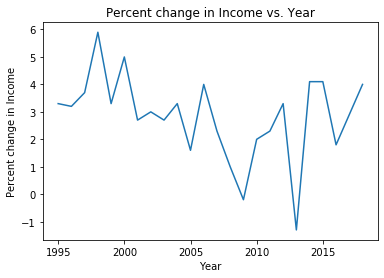

In [20]:
income_raw = pd.DataFrame(data["% Income Annual Change, Chained Dollars"])
income= np.zeros(24)
x = 0
for value in income_raw.iterrows():
    income[x] = income_raw.iloc(0)[x]
    x+=1
    
print("Mean Percent Change in Income: ", income.mean())
print("Standard Deviation of Percent Change in Income: ", income.std())

plt.plot(range(1995,2019),income)
plt.xlabel("Year")
plt.ylabel("Percent change in Income")
plt.title("Percent change in Income vs. Year")
plt.show()

The following plot shows total movie ticket sales per year over our timeframe of interest (1995 to 2018).

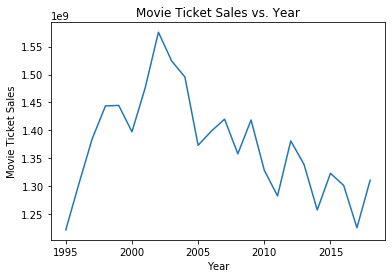

In [19]:
tickets_raw = pd.DataFrame(data["Total Tickets"])
tickets = np.zeros(24)
x = 0
for value in tickets_raw.iterrows():
    tickets[x] = tickets_raw.iloc(0)[x]
    x+=1

plt.plot(range(1995,2019),tickets)
plt.xlabel("Year")
plt.ylabel("Movie Ticket Sales")
plt.title("Movie Ticket Sales vs. Year")
plt.show()

## Model of relationships

In [26]:
model = LinearRegression().fit(data[["Total Tickets"]],data["% Income Annual Change, Chained Dollars"])
cor = model.coef_[0]

9.45031280639422e-10

## Evaluation of Significance

In [30]:
spearman = spearmanr(data[["Total Tickets"]],data["% Income Annual Change, Chained Dollars"])
spearman

SpearmanrResult(correlation=0.027038939774719262, pvalue=0.9001955262861653)